In [2]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns

In [31]:
!pip install scikit-learn

In [32]:
dataset = pd.read_csv('..\profiling\df_final.csv', low_memory=False)

In [33]:
display(dataset)

,subject_id,hadm_id,itemid,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,admittime_x,...,age,labevent_id,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,flag,priority,horas_desde_admissao_labevent,label_labevent
0,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9201.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN
1,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9197.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN
2,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9203.0,2157-12-19 10:25:00,NaN,NaN,NaN,NaN,ROUTINE,17.450000,NaN
3,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9204.0,2157-12-19 10:25:00,7.0,7.000,units,NaN,ROUTINE,17.450000,NaN
4,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9207.0,2157-12-19 10:25:00,1.011,1.011,,NaN,ROUTINE,17.450000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939811,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473850.0,2148-01-24 00:58:00,31.0,31.000,g/dL,abnormal,STAT,12.666667,NaN
11939812,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473849.0,2148-01-24 00:58:00,29.7,29.700,pg,NaN,STAT,12.666667,NaN
11939813,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473848.0,2148-01-24 00:58:00,6.6,6.600,g/dL,abnormal,STAT,12.666667,NaN
11939814,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473855.0,2148-01-24 00:58:00,10.1,10.100,K/uL,abnormal,STAT,12.666667,NaN


In [34]:
print(dataset.columns)

Index(['subject_id', 'hadm_id', 'itemid', 'charttime_chartevent',
       'value_chartevent', 'valuenum_chartevent', 'valueuom_chartevent',
       'label_chartevent', 'category', 'admittime_x',
       'horas_desde_admissao_chartevent', 'icd_code', 'long_title',
       'admission_type', 'insurance', 'race', 'admission_location', 'age',
       'labevent_id', 'charttime_labevent', 'value_labevent',
       'valuenum_labevent', 'valueuom_labevent', 'flag', 'priority',
       'horas_desde_admissao_labevent', 'label_labevent'],
      dtype='object')


In [33]:
import os
base_path = r"../documents/mimic-iv-clinical-database-demo-2.2/hosp"

files_to_load = {
    "admissions": "admissions.csv.gz",
    "d_hcpcs": "d_hcpcs.csv.gz",
    "d_icd_diagnoses": "d_icd_diagnoses.csv.gz",
    "d_labitems": "d_labitems.csv.gz",
    "diagnoses_icd": "diagnoses_icd.csv.gz",
    "emar": "emar.csv.gz",
    "hcpcsevents": "hcpcsevents.csv.gz",
    "labevents": "labevents.csv.gz",
    "omr": "omr.csv.gz"
}

for _, relative_path in files_to_load.items():
    full_path = os.path.join(base_path, relative_path)
    if os.path.exists(full_path):
        dataset_name = os.path.splitext(os.path.splitext(relative_path)[0])[0]  
        # primeiro remove .gz, depois .csv → fica só o nome do ficheiro
        print(f"\n🔹 Lendo {dataset_name} de: {full_path}")
        df = pd.read_csv(full_path, compression='gzip', low_memory=False)
        globals()[dataset_name] = df
        print(f"O dataset '{dataset_name}' tem {len(df)} linhas.")
        display(df.head())
    else:
        print(f"Ficheiro não encontrado: {full_path}")


🔹 Lendo admissions de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\admissions.csv.gz
O dataset 'admissions' tem 275 linhas.


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0



🔹 Lendo d_hcpcs de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\d_hcpcs.csv.gz
O dataset 'd_hcpcs' tem 89200 linhas.


,code,category,long_description,short_description
0,TD,NaN,Rn,Rn
1,A0428,NaN,"Ambulance service, basic life support, non-eme...",Bls
2,V5272,NaN,"Assistive listening device, tdd",Tdd
3,S2080,NaN,Laser-assisted uvulopalatoplasty (laup),Laup
4,S8037,NaN,Magnetic resonance cholangiopancreatography (m...,Mrcp



🔹 Lendo d_icd_diagnoses de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\d_icd_diagnoses.csv.gz
O dataset 'd_icd_diagnoses' tem 109775 linhas.


,icd_code,icd_version,long_title
0,0090,9,"Infectious colitis, enteritis, and gastroenter..."
1,01160,9,"Tuberculous pneumonia [any form], unspecified"
2,01186,9,"Other specified pulmonary tuberculosis, tuberc..."
3,01200,9,"Tuberculous pleurisy, unspecified"
4,01236,9,"Tuberculous laryngitis, tubercle bacilli not f..."



🔹 Lendo d_labitems de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\d_labitems.csv.gz
O dataset 'd_labitems' tem 1622 linhas.


,itemid,label,fluid,category
0,50808,Free Calcium,Blood,Blood Gas
1,50826,Tidal Volume,Blood,Blood Gas
2,50813,Lactate,Blood,Blood Gas
3,52029,% Ionized Calcium,Blood,Blood Gas
4,50801,Alveolar-arterial Gradient,Blood,Blood Gas



🔹 Lendo diagnoses_icd de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\diagnoses_icd.csv.gz
O dataset 'diagnoses_icd' tem 4506 linhas.


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10035185,22580999,3,4139,9
1,10035185,22580999,10,V707,9
2,10035185,22580999,1,41401,9
3,10035185,22580999,9,3899,9
4,10035185,22580999,11,V8532,9



🔹 Lendo emar de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\emar.csv.gz
O dataset 'emar' tem 35835 linhas.


,subject_id,hadm_id,emar_id,emar_seq,poe_id,pharmacy_id,enter_provider_id,charttime,medication,event_txt,scheduletime,storetime
0,10005909,20199380.0,10005909-74,74,10005909-97,96110427.0,NaN,2144-10-31 05:56:00,Magnesium Sulfate,NaN,2144-10-31 05:56:00,2144-10-31 05:56:00
1,10005909,20199380.0,10005909-79,79,10005909-97,96110427.0,NaN,2144-10-31 08:00:00,Magnesium Sulfate,NaN,2144-10-31 08:00:00,2144-10-31 08:15:00
2,10008287,22168393.0,10008287-32,32,10008287-58,NaN,P26PKF,2145-09-28 20:15:00,Potassium Chloride Replacement (Critical Care ...,NaN,2145-09-28 20:15:00,2145-09-28 20:38:00
3,10010471,21322534.0,10010471-33,33,10010471-51,52131847.0,NaN,2155-05-08 21:45:00,Metoprolol Tartrate,NaN,2155-05-08 21:45:00,2155-05-08 22:40:00
4,10015272,27993466.0,10015272-31,31,10015272-48,88758875.0,NaN,2137-06-13 08:36:00,Metoprolol Tartrate,NaN,2137-06-13 08:36:00,2137-06-13 08:36:00



🔹 Lendo hcpcsevents de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\hcpcsevents.csv.gz
O dataset 'hcpcsevents' tem 61 linhas.


,subject_id,hadm_id,chartdate,hcpcs_cd,seq_num,short_description
0,10005348,29176490,2129-05-22,93454,1,Cardiovascular
1,10005348,29176490,2129-05-22,92921,2,Cardiovascular
2,10004457,21039249,2140-09-17,92980,1,Cardiovascular
3,10004457,25559382,2148-09-14,93455,1,Cardiovascular
4,10039708,27504040,2142-07-06,64415,2,Nervous system



🔹 Lendo labevents de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\labevents.csv.gz
O dataset 'labevents' tem 107727 linhas.


,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,172061,10014354,29600294.0,1808066,51277,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,15.4,15.40,%,10.5,15.5,NaN,ROUTINE,NaN
1,172062,10014354,29600294.0,1808066,51279,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,3.35,3.35,m/uL,4.6,6.1,abnormal,ROUTINE,NaN
2,172068,10014354,29600294.0,1808066,52172,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,49.7,49.70,fL,35.1,46.3,abnormal,ROUTINE,NaN
3,172063,10014354,29600294.0,1808066,51301,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,20.3,20.30,K/uL,4.0,10.0,abnormal,ROUTINE,NaN
4,172050,10014354,29600294.0,1808066,51249,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,31.1,31.10,g/dL,32.0,37.0,abnormal,ROUTINE,NaN



🔹 Lendo omr de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\omr.csv.gz
O dataset 'omr' tem 2964 linhas.


,subject_id,chartdate,seq_num,result_name,result_value
0,10011398,2146-12-01,1,Height (Inches),63
1,10011398,2147-01-22,1,Weight (Lbs),127
2,10011398,2146-12-01,1,Weight (Lbs),135
3,10011398,2147-07-24,1,Weight (Lbs),136
4,10011398,2147-03-26,1,Weight (Lbs),136


In [4]:
import os
base_path = r"../documents/mimic-iv-clinical-database-demo-2.2/icu"

files_to_load = {
    "chartevents": "chartevents.csv.gz"
}

for _, relative_path in files_to_load.items():
    full_path = os.path.join(base_path, relative_path)
    if os.path.exists(full_path):
        dataset_name = os.path.splitext(os.path.splitext(relative_path)[0])[0]  
        # primeiro remove .gz, depois .csv → fica só o nome do ficheiro
        print(f"\n🔹 Lendo {dataset_name} de: {full_path}")
        df = pd.read_csv(full_path, compression='gzip', low_memory=False)
        globals()[dataset_name] = df
        print(f"O dataset '{dataset_name}' tem {len(df)} linhas.")
        display(df.head())
    else:
        print(f"Ficheiro não encontrado: {full_path}")


🔹 Lendo chartevents de: ../documents/mimic-iv-clinical-database-demo-2.2/icu\chartevents.csv.gz
O dataset 'chartevents' tem 668862 linhas.


,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:45:00,225054,On,NaN,NaN,0.0
1,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:43:00,223769,100,100.0,%,0.0
2,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,223956,Atrial demand,NaN,NaN,0.0
3,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,224866,Yes,NaN,NaN,0.0
4,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:45:00,227341,No,0.0,NaN,0.0


# Add Variables


In [5]:
display(omr)

,subject_id,chartdate,seq_num,result_name,result_value
0,10011398,2146-12-01,1,Height (Inches),63
1,10011398,2147-01-22,1,Weight (Lbs),127
2,10011398,2146-12-01,1,Weight (Lbs),135
3,10011398,2147-07-24,1,Weight (Lbs),136
4,10011398,2147-03-26,1,Weight (Lbs),136
...,...,...,...,...,...
2959,10021118,2161-11-15,1,Height (Inches),71
2960,10021118,2161-11-15,1,BMI (kg/m2),35.2
2961,10021118,2161-11-29,1,Blood Pressure,111/72
2962,10021118,2161-12-25,1,Blood Pressure,135/76


In [38]:
display(hcpcsevents)

,subject_id,hadm_id,chartdate,hcpcs_cd,seq_num,short_description
0,10005348,29176490,2129-05-22,93454,1,Cardiovascular
1,10005348,29176490,2129-05-22,92921,2,Cardiovascular
2,10004457,21039249,2140-09-17,92980,1,Cardiovascular
3,10004457,25559382,2148-09-14,93455,1,Cardiovascular
4,10039708,27504040,2142-07-06,64415,2,Nervous system
...,...,...,...,...,...,...
56,10039708,27504040,2142-07-06,99219,3,Hospital observation services
57,10039708,22999601,2142-05-15,99219,1,Hospital observation services
58,10035631,29654498,2113-07-17,99218,3,Hospital observation services
59,10012853,20457729,2177-11-03,99219,2,Hospital observation services


In [39]:
display(admissions)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,10038992,24745425,2187-07-29 01:05:00,2187-08-03 17:02:00,NaN,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
271,10008287,22168393,2145-09-28 01:17:00,2145-10-02 13:35:00,NaN,SURGICAL SAME DAY ADMISSION,P898NM,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0
272,10022880,27708593,2177-03-12 07:15:00,2177-03-19 14:25:00,NaN,SURGICAL SAME DAY ADMISSION,P99698,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
273,10004457,23251352,2141-12-17 11:00:00,2141-12-21 15:56:00,NaN,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,REHAB,Medicare,ENGLISH,SINGLE,OTHER,NaN,NaN,0


In [34]:
df_wide = omr.pivot_table(
    index=["subject_id", "chartdate"], 
    columns="result_name", 
    values="result_value",
    aggfunc="first"
).reset_index()

In [35]:
display (df_wide)

result_name,subject_id,chartdate,BMI (kg/m2),Blood Pressure,Blood Pressure Lying,Blood Pressure Sitting,Blood Pressure Standing (1 min),Blood Pressure Standing (3 mins),Height (Inches),Weight (Lbs)
0,10000032,2180-04-27,NaN,110/65,NaN,NaN,NaN,NaN,NaN,94
1,10000032,2180-05-07,18.0,NaN,NaN,NaN,NaN,NaN,60,92.15
2,10000032,2180-05-25,18.6,106/60,NaN,NaN,NaN,NaN,NaN,95
3,10000032,2180-06-01,18.7,121/77,NaN,NaN,NaN,NaN,NaN,95.7
4,10000032,2180-06-22,18.9,100/60,NaN,NaN,NaN,NaN,60,97
...,...,...,...,...,...,...,...,...,...,...
951,10040025,2147-11-09,30.3,NaN,NaN,NaN,NaN,NaN,NaN,188.00
952,10040025,2147-12-05,32.3,NaN,NaN,NaN,NaN,NaN,NaN,200.00
953,10040025,2147-12-29,34.2,NaN,NaN,NaN,NaN,NaN,NaN,212
954,10040025,2147-12-30,30.3,NaN,NaN,NaN,NaN,NaN,NaN,187.61


<Axes: xlabel='result_name'>

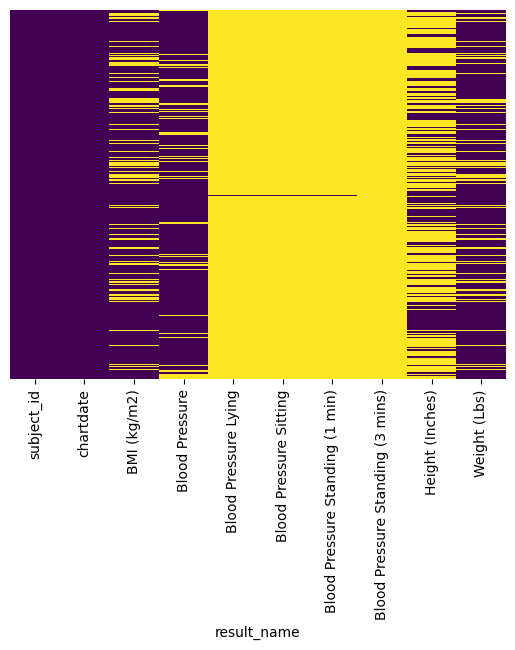

In [36]:
sns.heatmap(
    df_wide.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='viridis'
)

In [37]:
omr_new = df_wide.drop([
    'Blood Pressure Lying', 'Blood Pressure Sitting', 'Blood Pressure Standing (1 min)', 'Blood Pressure Standing (3 mins)'
], axis=1)

In [38]:
omr_new ['Height (Inches)'] = omr_new.groupby('subject_id')['Height (Inches)'].transform('first')

<Axes: xlabel='result_name'>

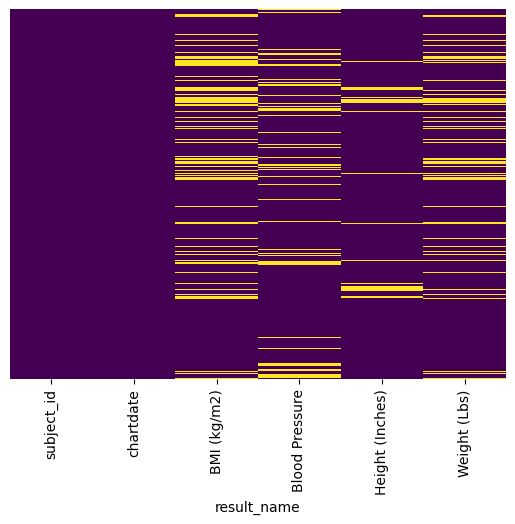

In [39]:
sns.heatmap(
    omr_new.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='viridis'
)

In [40]:
omr_new['charttime'] = pd.to_datetime(omr_new['chartdate'], errors='coerce')

In [41]:
display(omr_new)

result_name,subject_id,chartdate,BMI (kg/m2),Blood Pressure,Height (Inches),Weight (Lbs),charttime
0,10000032,2180-04-27,NaN,110/65,60,94,2180-04-27
1,10000032,2180-05-07,18.0,NaN,60,92.15,2180-05-07
2,10000032,2180-05-25,18.6,106/60,60,95,2180-05-25
3,10000032,2180-06-01,18.7,121/77,60,95.7,2180-06-01
4,10000032,2180-06-22,18.9,100/60,60,97,2180-06-22
...,...,...,...,...,...,...,...
951,10040025,2147-11-09,30.3,NaN,66,188.00,2147-11-09
952,10040025,2147-12-05,32.3,NaN,66,200.00,2147-12-05
953,10040025,2147-12-29,34.2,NaN,66,212,2147-12-29
954,10040025,2147-12-30,30.3,NaN,66,187.61,2147-12-30


In [48]:
display(dataset)

,subject_id,hadm_id,itemid,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,admittime_x,...,age,labevent_id,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,flag,priority,horas_desde_admissao_labevent,label_labevent
0,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9201.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN
1,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9197.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN
2,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9203.0,2157-12-19 10:25:00,NaN,NaN,NaN,NaN,ROUTINE,17.450000,NaN
3,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9204.0,2157-12-19 10:25:00,7.0,7.000,units,NaN,ROUTINE,17.450000,NaN
4,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9207.0,2157-12-19 10:25:00,1.011,1.011,,NaN,ROUTINE,17.450000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939811,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473850.0,2148-01-24 00:58:00,31.0,31.000,g/dL,abnormal,STAT,12.666667,NaN
11939812,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473849.0,2148-01-24 00:58:00,29.7,29.700,pg,NaN,STAT,12.666667,NaN
11939813,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473848.0,2148-01-24 00:58:00,6.6,6.600,g/dL,abnormal,STAT,12.666667,NaN
11939814,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473855.0,2148-01-24 00:58:00,10.1,10.100,K/uL,abnormal,STAT,12.666667,NaN


In [54]:
print(dataset['charttime_chartevent'].dtype)
print(omr_new['chartdate'].dtype)

print(dataset['charttime_chartevent'].head())
print(omr_new['chartdate'].head())

object
object
0    2157-12-19 15:00:00
1    2157-12-19 15:00:00
2    2157-12-19 15:00:00
3    2157-12-19 15:00:00
4    2157-12-19 15:00:00
Name: charttime_chartevent, dtype: object
0    2180-04-27
1    2180-05-07
2    2180-05-25
3    2180-06-01
4    2180-06-22
Name: chartdate, dtype: object


In [55]:

dataset["charttime_chartevent"] = pd.to_datetime(dataset["charttime_chartevent"], errors='coerce')
dataset["chartdate"] = dataset["charttime_chartevent"].dt.date

In [56]:
display(dataset)

,subject_id,hadm_id,itemid,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,admittime_x,...,labevent_id,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,flag,priority,horas_desde_admissao_labevent,label_labevent,chartdate
0,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,9201.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN,2157-12-19
1,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,9197.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN,2157-12-19
2,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,9203.0,2157-12-19 10:25:00,NaN,NaN,NaN,NaN,ROUTINE,17.450000,NaN,2157-12-19
3,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,9204.0,2157-12-19 10:25:00,7.0,7.000,units,NaN,ROUTINE,17.450000,NaN,2157-12-19
4,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,9207.0,2157-12-19 10:25:00,1.011,1.011,,NaN,ROUTINE,17.450000,NaN,2157-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939811,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,473850.0,2148-01-24 00:58:00,31.0,31.000,g/dL,abnormal,STAT,12.666667,NaN,2148-01-24
11939812,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,473849.0,2148-01-24 00:58:00,29.7,29.700,pg,NaN,STAT,12.666667,NaN,2148-01-24
11939813,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,473848.0,2148-01-24 00:58:00,6.6,6.600,g/dL,abnormal,STAT,12.666667,NaN,2148-01-24
11939814,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,473855.0,2148-01-24 00:58:00,10.1,10.100,K/uL,abnormal,STAT,12.666667,NaN,2148-01-24


In [58]:
dataset["chartdate"] = pd.to_datetime(dataset["chartdate"]).dt.date
omr_new["chartdate"] = pd.to_datetime(omr_new["chartdate"]).dt.date

# Garantir que subject_id seja inteiro
dataset["subject_id"] = dataset["subject_id"].astype(int)
omr_new["subject_id"] = omr_new["subject_id"].astype(int)

In [59]:
keys_atual = set(zip(dataset["subject_id"], dataset["chartdate"]))
keys_omr = set(zip(omr_new["subject_id"], omr_new["chartdate"]))

print("Total em dataset:", len(keys_atual))
print("Total em omr_new:", len(keys_omr))
print("Chaves em comum:", len(keys_atual & keys_omr))

Total em dataset: 157
Total em omr_new: 956
Chaves em comum: 3


In [60]:
dataset["chartdate"] = pd.to_datetime(dataset["chartdate"])
omr_new["chartdate"] = pd.to_datetime(omr_new["chartdate"])

## DOD

In [18]:
display(admissions)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,10038992,24745425,2187-07-29 01:05:00,2187-08-03 17:02:00,NaN,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
271,10008287,22168393,2145-09-28 01:17:00,2145-10-02 13:35:00,NaN,SURGICAL SAME DAY ADMISSION,P898NM,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0
272,10022880,27708593,2177-03-12 07:15:00,2177-03-19 14:25:00,NaN,SURGICAL SAME DAY ADMISSION,P99698,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
273,10004457,23251352,2141-12-17 11:00:00,2141-12-21 15:56:00,NaN,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,REHAB,Medicare,ENGLISH,SINGLE,OTHER,NaN,NaN,0


<Axes: >

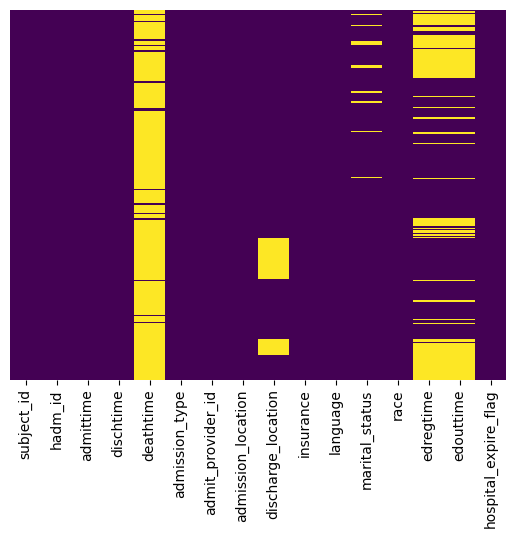

In [19]:
sns.heatmap(
    admissions.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='viridis'
)

In [20]:
admissions['deathtime'] = admissions['deathtime'].notna().astype(int)

In [21]:
display(admissions)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,0,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,0,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,1,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,0,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,10038992,24745425,2187-07-29 01:05:00,2187-08-03 17:02:00,0,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
271,10008287,22168393,2145-09-28 01:17:00,2145-10-02 13:35:00,0,SURGICAL SAME DAY ADMISSION,P898NM,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0
272,10022880,27708593,2177-03-12 07:15:00,2177-03-19 14:25:00,0,SURGICAL SAME DAY ADMISSION,P99698,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
273,10004457,23251352,2141-12-17 11:00:00,2141-12-21 15:56:00,0,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,REHAB,Medicare,ENGLISH,SINGLE,OTHER,NaN,NaN,0


In [22]:
display(dataset)

,subject_id,hadm_id,itemid,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,admittime_x,...,age,labevent_id,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,flag,priority,horas_desde_admissao_labevent,label_labevent
0,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9201.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN
1,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9197.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN
2,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9203.0,2157-12-19 10:25:00,NaN,NaN,NaN,NaN,ROUTINE,17.450000,NaN
3,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9204.0,2157-12-19 10:25:00,7.0,7.000,units,NaN,ROUTINE,17.450000,NaN
4,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9207.0,2157-12-19 10:25:00,1.011,1.011,,NaN,ROUTINE,17.450000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939811,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473850.0,2148-01-24 00:58:00,31.0,31.000,g/dL,abnormal,STAT,12.666667,NaN
11939812,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473849.0,2148-01-24 00:58:00,29.7,29.700,pg,NaN,STAT,12.666667,NaN
11939813,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473848.0,2148-01-24 00:58:00,6.6,6.600,g/dL,abnormal,STAT,12.666667,NaN
11939814,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473855.0,2148-01-24 00:58:00,10.1,10.100,K/uL,abnormal,STAT,12.666667,NaN


In [25]:
# mergeeee

df_dod = pd.merge(dataset,
    admissions[['subject_id', 'deathtime']],
    on='subject_id',
    how='left'
)

display(df_dod)


,subject_id,hadm_id,itemid,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,admittime_x,...,labevent_id,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,flag,priority,horas_desde_admissao_labevent,label_labevent,deathtime
0,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,9201.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN,0
1,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,9201.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN,0
2,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,9197.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN,0
3,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,9197.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN,0
4,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,9203.0,2157-12-19 10:25:00,NaN,NaN,NaN,NaN,ROUTINE,17.450000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57978811,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,473854.0,2148-01-24 00:58:00,2.22,2.22,m/uL,abnormal,STAT,12.666667,NaN,0
57978812,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,473854.0,2148-01-24 00:58:00,2.22,2.22,m/uL,abnormal,STAT,12.666667,NaN,0
57978813,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,473854.0,2148-01-24 00:58:00,2.22,2.22,m/uL,abnormal,STAT,12.666667,NaN,0
57978814,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,473854.0,2148-01-24 00:58:00,2.22,2.22,m/uL,abnormal,STAT,12.666667,NaN,0


In [26]:
display(omr_new)

result_name,subject_id,chartdate,BMI (kg/m2),Blood Pressure,Height (Inches),Weight (Lbs),charttime
0,10000032,2180-04-27,NaN,110/65,60,94,2180-04-27
1,10000032,2180-05-07,18.0,NaN,60,92.15,2180-05-07
2,10000032,2180-05-25,18.6,106/60,60,95,2180-05-25
3,10000032,2180-06-01,18.7,121/77,60,95.7,2180-06-01
4,10000032,2180-06-22,18.9,100/60,60,97,2180-06-22
...,...,...,...,...,...,...,...
951,10040025,2147-11-09,30.3,NaN,66,188.00,2147-11-09
952,10040025,2147-12-05,32.3,NaN,66,200.00,2147-12-05
953,10040025,2147-12-29,34.2,NaN,66,212,2147-12-29
954,10040025,2147-12-30,30.3,NaN,66,187.61,2147-12-30


In [29]:
print(df_dod['charttime_chartevent'].dtype)
print(omr_new['chartdate'].dtype)

print(df_dod['charttime_chartevent'].head())
print(omr_new['chartdate'].head())


object
object
0    2157-12-19 15:00:00
1    2157-12-19 15:00:00
2    2157-12-19 15:00:00
3    2157-12-19 15:00:00
4    2157-12-19 15:00:00
Name: charttime_chartevent, dtype: object
0    2180-04-27
1    2180-05-07
2    2180-05-25
3    2180-06-01
4    2180-06-22
Name: chartdate, dtype: object


In [35]:
df_dod['chartdate'] = df_dod['charttime_chartevent'].dt.strftime("%Y-%m-%d")
omr_new['chartdate'] = omr_new['chartdate'].dt.strftime("%Y-%m-%d")


In [36]:
print(df_dod['charttime_chartevent'].dtype)
print(omr['chartdate'].dtype)

datetime64[ns]
object


In [40]:
print(omr_new.columns)

Index(['subject_id', 'chartdate', 'BMI (kg/m2)', 'Blood Pressure',
       'Height (Inches)', 'Weight (Lbs)', 'charttime'],
      dtype='object', name='result_name')


## ............

In [41]:
df = pd.merge(
    df_dod,
    omr_new[['subject_id', 'chartdate', 'BMI (kg/m2)', 'Blood Pressure',
       'Height (Inches)', 'Weight (Lbs)']],
    on=['subject_id', 'chartdate'],
    how='left'
)


# Drops Before Final merge

In [43]:
display(df.head())

,subject_id,hadm_id,itemid,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,admittime_x,...,flag,priority,horas_desde_admissao_labevent,label_labevent,deathtime,chartdate,BMI (kg/m2),Blood Pressure,Height (Inches),Weight (Lbs)
0,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,NaN,ROUTINE,17.45,NaN,0,2157-12-19,NaN,NaN,NaN,NaN
1,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,NaN,ROUTINE,17.45,NaN,0,2157-12-19,NaN,NaN,NaN,NaN
2,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,NaN,ROUTINE,17.45,NaN,0,2157-12-19,NaN,NaN,NaN,NaN
3,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,NaN,ROUTINE,17.45,NaN,0,2157-12-19,NaN,NaN,NaN,NaN
4,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,NaN,ROUTINE,17.45,NaN,0,2157-12-19,NaN,NaN,NaN,NaN


In [47]:
print(df.columns)

Index(['subject_id', 'hadm_id', 'itemid', 'charttime_chartevent',
       'value_chartevent', 'valuenum_chartevent', 'valueuom_chartevent',
       'label_chartevent', 'category', 'admittime_x',
       'horas_desde_admissao_chartevent', 'icd_code', 'long_title',
       'admission_type', 'insurance', 'race', 'admission_location', 'age',
       'labevent_id', 'charttime_labevent', 'value_labevent',
       'valuenum_labevent', 'valueuom_labevent', 'flag', 'priority',
       'horas_desde_admissao_labevent', 'label_labevent', 'deathtime',
       'chartdate', 'BMI (kg/m2)', 'Blood Pressure', 'Height (Inches)',
       'Weight (Lbs)'],
      dtype='object')


In [42]:
df_dod.isna().sum().sort_values(ascending=False)

NameError: name 'df_dod' is not defined

In [ ]:
(df_dod.isna().mean().sort_values(ascending=False) * 100).round(2)


label_labevent                     100.00
valueuom_chartevent                 74.23
flag                                58.91
valuenum_chartevent                 56.48
valueuom_labevent                   17.84
priority                            16.86
valuenum_labevent                   16.00
value_labevent                      11.39
value_chartevent                     3.30
chartdate                            1.93
charttime_chartevent                 1.93
horas_desde_admissao_labevent        0.00
charttime_labevent                   0.00
labevent_id                          0.00
age                                  0.00
deathtime                            0.00
subject_id                           0.00
admission_location                   0.00
race                                 0.00
hadm_id                              0.00
admission_type                       0.00
long_title                           0.00
icd_code                             0.00
horas_desde_admissao_chartevent   

# AQUI

In [4]:
chunk_size = 1000000  # linhas por pedaço
chunks = pd.read_csv('df_dod.csv', chunksize=chunk_size, low_memory=False)
df_list = []
for chunk in chunks:
    df_list.append(chunk)
big = pd.concat(df_list, ignore_index=True)

In [6]:
display(big.head())

,subject_id,hadm_id,itemid,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,admittime_x,...,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,flag,priority,horas_desde_admissao_labevent,label_labevent,deathtime,chartdate
0,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.45,NaN,0,2157-12-19
2,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.45,NaN,0,2157-12-19
4,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,2157-12-19 10:25:00,NaN,NaN,NaN,NaN,ROUTINE,17.45,NaN,0,2157-12-19
6,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,2157-12-19 10:25:00,7.0,7.000,units,NaN,ROUTINE,17.45,NaN,0,2157-12-19
8,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,2157-12-19 10:25:00,1.011,1.011,,NaN,ROUTINE,17.45,NaN,0,2157-12-19


# Duplicates

In [5]:
big = big.drop_duplicates()

In [8]:
display(big)

,subject_id,hadm_id,itemid,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,admittime_x,...,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,flag,priority,horas_desde_admissao_labevent,label_labevent,deathtime,chartdate
0,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN,0,2157-12-19
2,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN,0,2157-12-19
4,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,2157-12-19 10:25:00,NaN,NaN,NaN,NaN,ROUTINE,17.450000,NaN,0,2157-12-19
6,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,2157-12-19 10:25:00,7.0,7.000,units,NaN,ROUTINE,17.450000,NaN,0,2157-12-19
8,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,2157-12-19 10:25:00,1.011,1.011,,NaN,ROUTINE,17.450000,NaN,0,2157-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57978766,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,2148-01-24 00:58:00,31.0,31.000,g/dL,abnormal,STAT,12.666667,NaN,0,2148-01-24
57978776,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,2148-01-24 00:58:00,29.7,29.700,pg,NaN,STAT,12.666667,NaN,0,2148-01-24
57978786,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,2148-01-24 00:58:00,6.6,6.600,g/dL,abnormal,STAT,12.666667,NaN,0,2148-01-24
57978796,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,2148-01-24 00:58:00,10.1,10.100,K/uL,abnormal,STAT,12.666667,NaN,0,2148-01-24


# Drops

Drop the variables with more then 50% os missing values


In [10]:
big_drop = big.drop(['hadm_id', 'itemid', 'labevent_id', 'label_labevent', 'valueuom_chartevent','flag'], axis=1)

In [13]:
big_drop = big_drop.to_csv('big_drop.csv')

In [3]:
atual = pd.read_csv('big_drop.csv')

C:\Users\catar\AppData\Local\Temp\ipykernel_28952\3812607197.py:1: DtypeWarning: Columns (2,9,23) have mixed types. Specify dtype option on import or set low_memory=False.
  atual = pd.read_csv('big_drop.csv')


In [44]:
display(atual)

,Unnamed: 0,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,label_chartevent,category,admittime_x,horas_desde_admissao_chartevent,icd_code,...,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,horas_desde_admissao_labevent,deathtime,chartdate
0,0,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,NaN,NaN,mg/dL,ROUTINE,17.450000,0,2157-12-19
1,2,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,NaN,NaN,mg/dL,ROUTINE,17.450000,0,2157-12-19
2,4,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,NaN,NaN,NaN,ROUTINE,17.450000,0,2157-12-19
3,6,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,7.0,7.000,units,ROUTINE,17.450000,0,2157-12-19
4,8,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,1.011,1.011,,ROUTINE,17.450000,0,2157-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13628051,57978766,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,31.0,31.000,g/dL,STAT,12.666667,0,2148-01-24
13628052,57978776,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,29.7,29.700,pg,STAT,12.666667,0,2148-01-24
13628053,57978786,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,6.6,6.600,g/dL,STAT,12.666667,0,2148-01-24
13628054,57978796,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,10.1,10.100,K/uL,STAT,12.666667,0,2148-01-24


In [45]:
print(atual.dtypes)

Unnamed: 0                           int64
subject_id                           int64
charttime_chartevent                object
value_chartevent                    object
valuenum_chartevent                float64
label_chartevent                    object
category                            object
admittime_x                         object
horas_desde_admissao_chartevent    float64
icd_code                            object
long_title                          object
admission_type                      object
insurance                           object
race                                object
admission_location                  object
age                                  int64
charttime_labevent                  object
value_labevent                      object
valuenum_labevent                  float64
valueuom_labevent                   object
priority                            object
horas_desde_admissao_labevent      float64
deathtime                            int64
chartdate  

In [46]:
display(omr_new)

result_name,subject_id,chartdate,BMI (kg/m2),Blood Pressure,Height (Inches),Weight (Lbs),charttime
0,10000032,2180-04-27,NaN,110/65,60,94,2180-04-27
1,10000032,2180-05-07,18.0,NaN,60,92.15,2180-05-07
2,10000032,2180-05-25,18.6,106/60,60,95,2180-05-25
3,10000032,2180-06-01,18.7,121/77,60,95.7,2180-06-01
4,10000032,2180-06-22,18.9,100/60,60,97,2180-06-22
...,...,...,...,...,...,...,...
951,10040025,2147-11-09,30.3,NaN,66,188.00,2147-11-09
952,10040025,2147-12-05,32.3,NaN,66,200.00,2147-12-05
953,10040025,2147-12-29,34.2,NaN,66,212,2147-12-29
954,10040025,2147-12-30,30.3,NaN,66,187.61,2147-12-30


In [47]:
print(omr_new.dtypes)

result_name
subject_id                  int64
chartdate                  object
BMI (kg/m2)                object
Blood Pressure             object
Height (Inches)            object
Weight (Lbs)               object
charttime          datetime64[ns]
dtype: object


In [48]:
# Criar chartdate a partir de charttime_chartevent
# Converter para datetime

atual["chartdate"] = pd.to_datetime(atual["chartdate"]).dt.normalize()
omr_new["chartdate"] = pd.to_datetime(omr_new["chartdate"]).dt.normalize()

In [49]:
keys_atual = set(zip(atual["subject_id"], atual["chartdate"]))
keys_omr = set(zip(omr_new["subject_id"], omr_new["chartdate"]))

print("Total em atual:", len(keys_atual))
print("Total em omr_new:", len(keys_omr))
print("Chaves em comum:", len(keys_atual & keys_omr))


Total em atual: 157
Total em omr_new: 956
Chaves em comum: 3


In [50]:
atual["subject_id"] = atual["subject_id"].astype("int64")
omr_new["subject_id"] = omr_new["subject_id"].astype("int64")

In [51]:
omr_new = omr_new.dropna(subset=["chartdate"])

In [52]:
display(atual)

,Unnamed: 0,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,label_chartevent,category,admittime_x,horas_desde_admissao_chartevent,icd_code,...,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,horas_desde_admissao_labevent,deathtime,chartdate
0,0,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,NaN,NaN,mg/dL,ROUTINE,17.450000,0,2157-12-19
1,2,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,NaN,NaN,mg/dL,ROUTINE,17.450000,0,2157-12-19
2,4,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,NaN,NaN,NaN,ROUTINE,17.450000,0,2157-12-19
3,6,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,7.0,7.000,units,ROUTINE,17.450000,0,2157-12-19
4,8,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,1.011,1.011,,ROUTINE,17.450000,0,2157-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13628051,57978766,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,31.0,31.000,g/dL,STAT,12.666667,0,2148-01-24
13628052,57978776,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,29.7,29.700,pg,STAT,12.666667,0,2148-01-24
13628053,57978786,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,6.6,6.600,g/dL,STAT,12.666667,0,2148-01-24
13628054,57978796,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,10.1,10.100,K/uL,STAT,12.666667,0,2148-01-24


# Handle Missing values

In [53]:
print(atual.dtypes)

Unnamed: 0                                  int64
subject_id                                  int64
charttime_chartevent                       object
value_chartevent                           object
valuenum_chartevent                       float64
label_chartevent                           object
category                                   object
admittime_x                                object
horas_desde_admissao_chartevent           float64
icd_code                                   object
long_title                                 object
admission_type                             object
insurance                                  object
race                                       object
admission_location                         object
age                                         int64
charttime_labevent                         object
value_labevent                             object
valuenum_labevent                         float64
valueuom_labevent                          object


### Dtypes correcting

In [54]:
# date type
atual['charttime_chartevent'] = pd.to_datetime(atual['charttime_chartevent'], errors='coerce')
atual['admittime_x'] = pd.to_datetime(atual['admittime_x'], errors='coerce')
atual['charttime_labevent'] = pd.to_datetime(atual['charttime_labevent'], errors='coerce')
atual['chartdate'] = pd.to_datetime(atual['chartdate'], errors='coerce')

In [55]:
(atual.isna().mean().sort_values(ascending=False) * 100).round(2)

valuenum_chartevent                55.82
priority                           23.32
valueuom_labevent                  14.81
valuenum_labevent                  12.97
value_labevent                      8.13
charttime_chartevent                3.77
chartdate                           3.07
value_chartevent                    3.04
admittime_x                         1.11
horas_desde_admissao_labevent       0.00
charttime_labevent                  0.00
admission_location                  0.00
deathtime                           0.00
age                                 0.00
Unnamed: 0                          0.00
race                                0.00
subject_id                          0.00
admission_type                      0.00
long_title                          0.00
icd_code                            0.00
horas_desde_admissao_chartevent     0.00
category                            0.00
label_chartevent                    0.00
insurance                           0.00
dtype: float64

# Handle Missing values

In [56]:
'''new_chart = chartevents[['subject_id', 'charttime', 'itemid']]
new_chart['charttime'] = pd.to_datetime(new_chart['charttime'])
df_merged = atual.merge(new_chart, 
                     left_on=['subject_id', 'charttime_chartevent'], 
                     right_on=['subject_id', 'charttime'], 
                     how='left')'''

"new_chart = chartevents[['subject_id', 'charttime', 'itemid']]\nnew_chart['charttime'] = pd.to_datetime(new_chart['charttime'])\ndf_merged = atual.merge(new_chart, \n                     left_on=['subject_id', 'charttime_chartevent'], \n                     right_on=['subject_id', 'charttime'], \n                     how='left')"

In [57]:
display(atual)

,Unnamed: 0,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,label_chartevent,category,admittime_x,horas_desde_admissao_chartevent,icd_code,...,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,horas_desde_admissao_labevent,deathtime,chartdate
0,0,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,NaN,NaN,mg/dL,ROUTINE,17.450000,0,2157-12-19
1,2,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,NaN,NaN,mg/dL,ROUTINE,17.450000,0,2157-12-19
2,4,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,NaN,NaN,NaN,ROUTINE,17.450000,0,2157-12-19
3,6,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,7.0,7.000,units,ROUTINE,17.450000,0,2157-12-19
4,8,10001217,2157-12-19 15:00:00,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,22.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,1.011,1.011,,ROUTINE,17.450000,0,2157-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13628051,57978766,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,31.0,31.000,g/dL,STAT,12.666667,0,2148-01-24
13628052,57978776,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,29.7,29.700,pg,STAT,12.666667,0,2148-01-24
13628053,57978786,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,6.6,6.600,g/dL,STAT,12.666667,0,2148-01-24
13628054,57978796,10040025,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,Problem List,General,2148-01-23 12:18:00,19.738056,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,10.1,10.100,K/uL,STAT,12.666667,0,2148-01-24


In [58]:
df_clean = atual.dropna(subset=['valuenum_chartevent', 'charttime_chartevent', 'valueuom_labevent', 'valuenum_labevent', 'value_labevent'])

In [59]:
display(df_clean)

,Unnamed: 0,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,label_chartevent,category,admittime_x,horas_desde_admissao_chartevent,icd_code,...,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,horas_desde_admissao_labevent,deathtime,chartdate
109,218,10001217,2157-12-19 16:00:00,100,100.0,O2 saturation pulseoxymetry,Respiratory,2157-12-18 16:58:00,23.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,7.0,7.000,units,ROUTINE,17.450000,0,2157-12-19
110,220,10001217,2157-12-19 16:00:00,100,100.0,O2 saturation pulseoxymetry,Respiratory,2157-12-18 16:58:00,23.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,1.011,1.011,,ROUTINE,17.450000,0,2157-12-19
122,244,10001217,2157-12-19 16:00:00,100,100.0,O2 saturation pulseoxymetry,Respiratory,2157-12-18 16:58:00,23.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 10:25:00,2,2.000,#/hpf,ROUTINE,17.450000,0,2157-12-19
126,252,10001217,2157-12-19 16:00:00,100,100.0,O2 saturation pulseoxymetry,Respiratory,2157-12-18 16:58:00,23.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 04:50:00,12.3,12.300,sec,ROUTINE,11.866667,0,2157-12-19
127,254,10001217,2157-12-19 16:00:00,100,100.0,O2 saturation pulseoxymetry,Respiratory,2157-12-18 16:58:00,23.033333,4019,...,PHYSICIAN REFERRAL,55,2157-12-19 04:50:00,32.8,32.800,sec,ROUTINE,11.866667,0,2157-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13627291,57971166,10040025,2148-01-24 04:59:00,55,55.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2148-01-23 12:18:00,16.683333,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,31.0,31.000,g/dL,STAT,12.666667,0,2148-01-24
13627292,57971176,10040025,2148-01-24 04:59:00,55,55.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2148-01-23 12:18:00,16.683333,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,29.7,29.700,pg,STAT,12.666667,0,2148-01-24
13627293,57971186,10040025,2148-01-24 04:59:00,55,55.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2148-01-23 12:18:00,16.683333,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,6.6,6.600,g/dL,STAT,12.666667,0,2148-01-24
13627294,57971196,10040025,2148-01-24 04:59:00,55,55.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2148-01-23 12:18:00,16.683333,E039,...,TRANSFER FROM SKILLED NURSING FACILITY,69,2148-01-24 00:58:00,10.1,10.100,K/uL,STAT,12.666667,0,2148-01-24


In [60]:
min_count = df_clean['icd_code'].value_counts().min()
print(min_count)

58161


In [61]:
min_count = 58161

df_sample = df_clean.groupby('icd_code', group_keys=False).sample(n=min_count, random_state=42)
display(df_sample)

,Unnamed: 0,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,label_chartevent,category,admittime_x,horas_desde_admissao_chartevent,icd_code,...,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,horas_desde_admissao_labevent,deathtime,chartdate
749683,3152975,10004457,2141-12-18 00:07:00,Full resistance,5.0,Strength L Arm,Neurological,2141-12-17 11:00:00,13.116667,2724,...,PHYSICIAN REFERRAL,66,2141-12-17 12:54:00,138,138.0,mg/dL,NaN,1.900000,0,2141-12-18
12097467,48159086,10037928,2177-07-14 21:06:00,1,1.0,20 Gauge Dressing Occlusive,Access Lines - Peripheral,2177-07-14 16:55:00,4.183333,2724,...,EMERGENCY ROOM,80,2177-07-14 21:07:00,17.4,17.4,%,ROUTINE,4.200000,0,2177-07-14
9332030,44000909,10023771,2113-08-25 12:34:00,100,100.0,O2 saturation pulseoxymetry,Respiratory,2113-08-25 07:15:00,5.316667,2724,...,PHYSICIAN REFERRAL,70,2113-08-26 03:15:00,0.8,0.8,mg/dL,ROUTINE,20.000000,0,2113-08-25
12138634,48570756,10037928,2177-07-15 01:25:00,Some resistance,4.0,Strength L Leg,Neurological,2177-07-14 16:55:00,8.500000,2724,...,EMERGENCY ROOM,80,2177-07-14 21:07:00,106,106.0,mEq/L,ROUTINE,4.200000,0,2177-07-15
6019930,34636305,10021938,2181-10-13 03:23:00,106,106.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2181-10-13 01:48:00,1.583333,2724,...,EMERGENCY ROOM,65,2181-10-13 12:00:00,24,24.0,mEq/L,STAT,10.200000,0,2181-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138012,4227650,10010471,2155-12-03 10:03:00,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2155-12-02 19:36:00,14.450000,Z87891,...,EMERGENCY ROOM,89,2155-12-03 05:41:00,11.9,11.9,sec,ROUTINE,10.083333,0,2155-12-03
7054416,37180822,10023117,2175-03-21 16:00:00,-1 Awakens to voice (eye opening/contact) > 10...,-1.0,Richmond-RAS Scale,Pain/Sedation,2175-03-20 23:29:00,16.516667,Z87891,...,TRANSFER FROM HOSPITAL,58,2175-03-21 02:03:00,15.1,15.1,K/uL,STAT,2.566667,0,2175-03-21
6698424,35934850,10023117,2175-03-21 09:00:00,22,22.0,Peak Insp. Pressure,Respiratory,2175-03-20 23:29:00,9.516667,Z87891,...,TRANSFER FROM HOSPITAL,58,2175-03-21 06:41:00,31.7,31.7,sec,STAT,7.200000,0,2175-03-21
7726764,39534040,10023117,2175-03-21 04:15:00,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2175-03-20 23:29:00,4.766667,Z87891,...,TRANSFER FROM HOSPITAL,58,2175-03-21 04:58:00,12.9,12.9,g/dL,STAT,5.483333,0,2175-03-21


In [66]:
print("original distribution:")
print(df_sample['icd_code'].value_counts(normalize=True).head())

print("\n now distribution:")
print(df_sample['icd_code'].value_counts(normalize=True).head())

original distribution:
icd_code
2724    0.125
4019    0.125
2724    0.125
4019    0.125
E039    0.125
Name: proportion, dtype: float64

 now distribution:
icd_code
2724    0.125
4019    0.125
2724    0.125
4019    0.125
E039    0.125
Name: proportion, dtype: float64


In [67]:
(df_sample.isna().mean().sort_values(ascending=False) * 100).round(2)

admittime_x                        0.81
Unnamed: 0                         0.00
race                               0.00
deathtime                          0.00
horas_desde_admissao_labevent      0.00
priority                           0.00
valueuom_labevent                  0.00
valuenum_labevent                  0.00
value_labevent                     0.00
charttime_labevent                 0.00
age                                0.00
admission_location                 0.00
insurance                          0.00
subject_id                         0.00
admission_type                     0.00
long_title                         0.00
icd_code                           0.00
horas_desde_admissao_chartevent    0.00
category                           0.00
label_chartevent                   0.00
valuenum_chartevent                0.00
value_chartevent                   0.00
charttime_chartevent               0.00
chartdate                          0.00
dtype: float64

In [68]:
print("original distribution:")
print(df_sample['icd_code'].value_counts(normalize=True).head())

print("\n now distribution:")
print(df_sample['icd_code'].value_counts(normalize=True).head())

original distribution:
icd_code
2724    0.125
4019    0.125
2724    0.125
4019    0.125
E039    0.125
Name: proportion, dtype: float64

 now distribution:
icd_code
2724    0.125
4019    0.125
2724    0.125
4019    0.125
E039    0.125
Name: proportion, dtype: float64


In [69]:
df_sample['priority'] = df_sample['priority'].fillna('Unknown')
df_sample['value_chartevent'] = df_sample['value_chartevent'].fillna('Unknown')

In [70]:
(df_sample.isna().mean().sort_values(ascending=False) * 100).round(2)

admittime_x                        0.81
Unnamed: 0                         0.00
race                               0.00
deathtime                          0.00
horas_desde_admissao_labevent      0.00
priority                           0.00
valueuom_labevent                  0.00
valuenum_labevent                  0.00
value_labevent                     0.00
charttime_labevent                 0.00
age                                0.00
admission_location                 0.00
insurance                          0.00
subject_id                         0.00
admission_type                     0.00
long_title                         0.00
icd_code                           0.00
horas_desde_admissao_chartevent    0.00
category                           0.00
label_chartevent                   0.00
valuenum_chartevent                0.00
value_chartevent                   0.00
charttime_chartevent               0.00
chartdate                          0.00
dtype: float64

In [71]:
df_sample["chartdate"] = pd.to_datetime(df_sample["chartdate"], errors="coerce")

In [72]:
df_sample = df_sample.to_csv('df_clean.csv')

In [4]:
df_sample = pd.read_csv('df_clean.csv')

C:\Users\catar\AppData\Local\Temp\ipykernel_28952\381612512.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sample = pd.read_csv('df_clean.csv')


In [5]:
print(df_sample.dtypes)

Unnamed: 0.1                         int64
Unnamed: 0                           int64
subject_id                           int64
charttime_chartevent                object
value_chartevent                    object
valuenum_chartevent                float64
label_chartevent                    object
category                            object
admittime_x                         object
horas_desde_admissao_chartevent    float64
icd_code                            object
long_title                          object
admission_type                      object
insurance                           object
race                                object
admission_location                  object
age                                  int64
charttime_labevent                  object
value_labevent                      object
valuenum_labevent                  float64
valueuom_labevent                   object
priority                            object
horas_desde_admissao_labevent      float64
deathtime  

In [6]:
df_sample["chartdate"] = pd.to_datetime(df_sample["chartdate"], errors="coerce")
df_sample["charttime_chartevent"] = pd.to_datetime(df_sample["charttime_chartevent"], errors="coerce")
df_sample["charttime_labevent"] = pd.to_datetime(df_sample["charttime_labevent"], errors="coerce")
df_sample["admittime_x"] = pd.to_datetime(df_sample["admittime_x"], errors="coerce")

In [7]:
def closest_measure(row, omr_df):
    sub = omr_df[omr_df["subject_id"] == row["subject_id"]]
    if sub.empty:
         return pd.Series(
            {"BMI (kg/m2)": None, "Height (Inches)": None, "Weight (Lbs)": None}
        )
    
    # Diferença absoluta em dias
    closest_idx = (sub["chartdate"] - row["chartdate"]).abs().idxmin()
    return sub.loc[closest_idx, ["BMI (kg/m2)", "Height (Inches)", "Weight (Lbs)"]]

df_sample[["BMI (kg/m2)", "Height (Inches)", "Weight (Lbs)"]] = df_sample.apply(
    closest_measure, axis=1, omr_df=omr_new
)

NameError: name 'omr_new' is not defined

In [ ]:
print("original distribution:")
print(df_sample['icd_code'].value_counts(normalize=True).head())

print("\n now distribution:")
print(df_sample['icd_code'].value_counts(normalize=True).head())

original distribution:
icd_code
2724    0.250000
4019    0.242976
E039    0.125000
E785    0.125000
Z794    0.125000
Name: proportion, dtype: float64

 now distribution:
icd_code
2724    0.250000
4019    0.242976
E039    0.125000
E785    0.125000
Z794    0.125000
Name: proportion, dtype: float64


In [6]:
display(df_sample)

,Unnamed: 0.1,Unnamed: 0,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,label_chartevent,category,admittime_x,horas_desde_admissao_chartevent,...,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,horas_desde_admissao_labevent,deathtime,chartdate
0,749683,3152975,10004457,2141-12-18 00:07:00,Full resistance,5.0,Strength L Arm,Neurological,2141-12-17 11:00:00,13.116667,...,PHYSICIAN REFERRAL,66,2141-12-17 12:54:00,138,138.0,mg/dL,Unknown,1.900000,0,2141-12-18
1,12097467,48159086,10037928,2177-07-14 21:06:00,1,1.0,20 Gauge Dressing Occlusive,Access Lines - Peripheral,2177-07-14 16:55:00,4.183333,...,EMERGENCY ROOM,80,2177-07-14 21:07:00,17.4,17.4,%,ROUTINE,4.200000,0,2177-07-14
2,9332030,44000909,10023771,2113-08-25 12:34:00,100,100.0,O2 saturation pulseoxymetry,Respiratory,2113-08-25 07:15:00,5.316667,...,PHYSICIAN REFERRAL,70,2113-08-26 03:15:00,0.8,0.8,mg/dL,ROUTINE,20.000000,0,2113-08-25
3,12138634,48570756,10037928,2177-07-15 01:25:00,Some resistance,4.0,Strength L Leg,Neurological,2177-07-14 16:55:00,8.500000,...,EMERGENCY ROOM,80,2177-07-14 21:07:00,106,106.0,mEq/L,ROUTINE,4.200000,0,2177-07-15
4,6019930,34636305,10021938,2181-10-13 03:23:00,106,106.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2181-10-13 01:48:00,1.583333,...,EMERGENCY ROOM,65,2181-10-13 12:00:00,24,24.0,mEq/L,STAT,10.200000,0,2181-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465283,1138012,4227650,10010471,2155-12-03 10:03:00,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2155-12-02 19:36:00,14.450000,...,EMERGENCY ROOM,89,2155-12-03 05:41:00,11.9,11.9,sec,ROUTINE,10.083333,0,2155-12-03
465284,7054416,37180822,10023117,2175-03-21 16:00:00,-1 Awakens to voice (eye opening/contact) > 10...,-1.0,Richmond-RAS Scale,Pain/Sedation,2175-03-20 23:29:00,16.516667,...,TRANSFER FROM HOSPITAL,58,2175-03-21 02:03:00,15.1,15.1,K/uL,STAT,2.566667,0,2175-03-21
465285,6698424,35934850,10023117,2175-03-21 09:00:00,22,22.0,Peak Insp. Pressure,Respiratory,2175-03-20 23:29:00,9.516667,...,TRANSFER FROM HOSPITAL,58,2175-03-21 06:41:00,31.7,31.7,sec,STAT,7.200000,0,2175-03-21
465286,7726764,39534040,10023117,2175-03-21 04:15:00,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2175-03-20 23:29:00,4.766667,...,TRANSFER FROM HOSPITAL,58,2175-03-21 04:58:00,12.9,12.9,g/dL,STAT,5.483333,0,2175-03-21


In [7]:
(df_sample.isna().mean().sort_values(ascending=False) * 100).round(2)

admittime_x                        0.81
Unnamed: 0.1                       0.00
insurance                          0.00
deathtime                          0.00
horas_desde_admissao_labevent      0.00
priority                           0.00
valueuom_labevent                  0.00
valuenum_labevent                  0.00
value_labevent                     0.00
charttime_labevent                 0.00
age                                0.00
admission_location                 0.00
race                               0.00
admission_type                     0.00
Unnamed: 0                         0.00
long_title                         0.00
icd_code                           0.00
horas_desde_admissao_chartevent    0.00
category                           0.00
label_chartevent                   0.00
valuenum_chartevent                0.00
value_chartevent                   0.00
charttime_chartevent               0.00
subject_id                         0.00
chartdate                          0.00


In [8]:
df_sample["Height (Inches)"] = df_sample.groupby("subject_id")["Height (Inches)"].transform(
    lambda x: x.ffill().bfill()
)

KeyError: 'Column not found: Height (Inches)'

In [9]:
(df_sample.isna().mean().sort_values(ascending=False) * 100).round(2)

admittime_x                        0.81
Unnamed: 0.1                       0.00
insurance                          0.00
deathtime                          0.00
horas_desde_admissao_labevent      0.00
priority                           0.00
valueuom_labevent                  0.00
valuenum_labevent                  0.00
value_labevent                     0.00
charttime_labevent                 0.00
age                                0.00
admission_location                 0.00
race                               0.00
admission_type                     0.00
Unnamed: 0                         0.00
long_title                         0.00
icd_code                           0.00
horas_desde_admissao_chartevent    0.00
category                           0.00
label_chartevent                   0.00
valuenum_chartevent                0.00
value_chartevent                   0.00
charttime_chartevent               0.00
subject_id                         0.00
chartdate                          0.00


In [10]:
print(df_sample.dtypes)

Unnamed: 0.1                                int64
Unnamed: 0                                  int64
subject_id                                  int64
charttime_chartevent               datetime64[ns]
value_chartevent                           object
valuenum_chartevent                       float64
label_chartevent                           object
category                                   object
admittime_x                        datetime64[ns]
horas_desde_admissao_chartevent           float64
icd_code                                   object
long_title                                 object
admission_type                             object
insurance                                  object
race                                       object
admission_location                         object
age                                         int64
charttime_labevent                 datetime64[ns]
value_labevent                             object
valuenum_labevent                         float64


In [11]:
df_sample['BMI (kg/m2)'] = df_sample['BMI (kg/m2)'].astype(float)
df_sample['Height (Inches)'] = df_sample['Height (Inches)'].astype(float)
df_sample['Weight (Lbs)'] = df_sample['Weight (Lbs)'].astype(float)

KeyError: 'BMI (kg/m2)'

In [ ]:
def complete_info(df):

    bmi = df['BMI (kg/m2)'].isna() & df["Height (Inches)"].notna() & df["Weight (Lbs)"].notna()
    df.loc[bmi, "BMI (kg/m2)"] = (
        df.loc[bmi, "Weight (Lbs)"] * 0.453592 / ((df.loc[bmi, "Height (Inches)"] * 0.0254) ** 2)
    )

    weight = df["Weight (Lbs)"].isna() & df["Height (Inches)"].notna() & df["BMI (kg/m2)"].notna()
    df.loc[weight, "Weight (Lbs)"] = (
        df.loc[weight, "BMI (kg/m2)"] *
        ((df.loc[weight, "Height (Inches)"] * 0.0254) ** 2) / 0.453592
    )

    height = df["Height (Inches)"].isna() & df["Weight (Lbs)"].notna() & df["BMI (kg/m2)"].notna()
    df.loc[height, "Height (Inches)"] = (
        np.sqrt((df.loc[height, "Weight (Lbs)"] * 0.453592) / df.loc[height, "BMI (kg/m2)"]) / 0.0254
    )

    return df

In [85]:
df_completed = complete_info(df_sample)
display(df_completed)

,Unnamed: 0.1,Unnamed: 0,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,label_chartevent,category,admittime_x,horas_desde_admissao_chartevent,...,value_labevent,valuenum_labevent,valueuom_labevent,priority,horas_desde_admissao_labevent,deathtime,chartdate,BMI (kg/m2),Height (Inches),Weight (Lbs)
0,749683,3152975,10004457,2141-12-18 00:07:00,Full resistance,5.0,Strength L Arm,Neurological,2141-12-17 11:00:00,13.116667,...,138,138.0,mg/dL,Unknown,1.900000,0,2141-12-18,NaN,71.00,NaN
1,12097467,48159086,10037928,2177-07-14 21:06:00,1,1.0,20 Gauge Dressing Occlusive,Access Lines - Peripheral,2177-07-14 16:55:00,4.183333,...,17.4,17.4,%,ROUTINE,4.200000,0,2177-07-14,23.6,60.00,121.00
2,9332030,44000909,10023771,2113-08-25 12:34:00,100,100.0,O2 saturation pulseoxymetry,Respiratory,2113-08-25 07:15:00,5.316667,...,0.8,0.8,mg/dL,ROUTINE,20.000000,0,2113-08-25,NaN,NaN,NaN
3,12138634,48570756,10037928,2177-07-15 01:25:00,Some resistance,4.0,Strength L Leg,Neurological,2177-07-14 16:55:00,8.500000,...,106,106.0,mEq/L,ROUTINE,4.200000,0,2177-07-15,23.6,60.00,121.00
4,6019930,34636305,10021938,2181-10-13 03:23:00,106,106.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2181-10-13 01:48:00,1.583333,...,24,24.0,mEq/L,STAT,10.200000,0,2181-10-13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465283,1138012,4227650,10010471,2155-12-03 10:03:00,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2155-12-02 19:36:00,14.450000,...,11.9,11.9,sec,ROUTINE,10.083333,0,2155-12-03,26.0,66.00,161.16
465284,7054416,37180822,10023117,2175-03-21 16:00:00,-1 Awakens to voice (eye opening/contact) > 10...,-1.0,Richmond-RAS Scale,Pain/Sedation,2175-03-20 23:29:00,16.516667,...,15.1,15.1,K/uL,STAT,2.566667,0,2175-03-21,25.8,67.63,165.00
465285,6698424,35934850,10023117,2175-03-21 09:00:00,22,22.0,Peak Insp. Pressure,Respiratory,2175-03-20 23:29:00,9.516667,...,31.7,31.7,sec,STAT,7.200000,0,2175-03-21,25.8,67.63,165.00
465286,7726764,39534040,10023117,2175-03-21 04:15:00,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,2175-03-20 23:29:00,4.766667,...,12.9,12.9,g/dL,STAT,5.483333,0,2175-03-21,25.8,67.63,165.00


In [86]:
(df_completed.isna().mean().sort_values(ascending=False) * 100).round(2)

BMI (kg/m2)                        55.02
Weight (Lbs)                       42.66
Height (Inches)                    36.19
admittime_x                         0.81
admission_location                  0.00
chartdate                           0.00
deathtime                           0.00
horas_desde_admissao_labevent       0.00
priority                            0.00
valueuom_labevent                   0.00
valuenum_labevent                   0.00
value_labevent                      0.00
charttime_labevent                  0.00
age                                 0.00
Unnamed: 0.1                        0.00
Unnamed: 0                          0.00
insurance                           0.00
admission_type                      0.00
long_title                          0.00
icd_code                            0.00
horas_desde_admissao_chartevent     0.00
category                            0.00
label_chartevent                    0.00
valuenum_chartevent                 0.00
value_chartevent

In [87]:
df_completed['BMI (kg/m2)'] = df_completed['BMI (kg/m2)'].fillna(0)
df_completed['Height (Inches)'] = df_completed['Height (Inches)'].fillna(0)
df_completed['Weight (Lbs)'] = df_completed['Weight (Lbs)'].fillna(0)

In [88]:
(df_completed.isna().mean().sort_values(ascending=False) * 100).round(2)

admittime_x                        0.81
Unnamed: 0.1                       0.00
admission_location                 0.00
Height (Inches)                    0.00
BMI (kg/m2)                        0.00
chartdate                          0.00
deathtime                          0.00
horas_desde_admissao_labevent      0.00
priority                           0.00
valueuom_labevent                  0.00
valuenum_labevent                  0.00
value_labevent                     0.00
charttime_labevent                 0.00
age                                0.00
race                               0.00
Unnamed: 0                         0.00
insurance                          0.00
admission_type                     0.00
long_title                         0.00
icd_code                           0.00
horas_desde_admissao_chartevent    0.00
category                           0.00
label_chartevent                   0.00
valuenum_chartevent                0.00
value_chartevent                   0.00


In [89]:
df_completed = df_completed.to_csv('df_completed.csv')

# Feature Selection + Engeneering

In [8]:
df = pd.read_csv('df_completed.csv')

C:\Users\catar\AppData\Local\Temp\ipykernel_28952\2548185332.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_completed.csv')


In [9]:
print(df.columns)

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'subject_id',
       'charttime_chartevent', 'value_chartevent', 'valuenum_chartevent',
       'label_chartevent', 'category', 'admittime_x',
       'horas_desde_admissao_chartevent', 'icd_code', 'long_title',
       'admission_type', 'insurance', 'race', 'admission_location', 'age',
       'charttime_labevent', 'value_labevent', 'valuenum_labevent',
       'valueuom_labevent', 'priority', 'horas_desde_admissao_labevent',
       'deathtime', 'chartdate', 'BMI (kg/m2)', 'Height (Inches)',
       'Weight (Lbs)'],
      dtype='object')


# Feature Engeneering

In [10]:
# drops
df_drop = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'chartdate', 'admittime_x', 'charttime_chartevent','charttime_labevent','Unnamed: 0.2' ], axis=1)


In [11]:
display(df_drop)

,subject_id,value_chartevent,valuenum_chartevent,label_chartevent,category,horas_desde_admissao_chartevent,icd_code,long_title,admission_type,insurance,...,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,horas_desde_admissao_labevent,deathtime,BMI (kg/m2),Height (Inches),Weight (Lbs)
0,10004457,Full resistance,5.0,Strength L Arm,Neurological,13.116667,2724,Other and unspecified hyperlipidemia,SURGICAL SAME DAY ADMISSION,Medicare,...,66,138,138.0,mg/dL,Unknown,1.900000,0,0.0,71.00,0.00
1,10037928,1,1.0,20 Gauge Dressing Occlusive,Access Lines - Peripheral,4.183333,2724,Other and unspecified hyperlipidemia,EW EMER.,Medicare,...,80,17.4,17.4,%,ROUTINE,4.200000,0,23.6,60.00,121.00
2,10023771,100,100.0,O2 saturation pulseoxymetry,Respiratory,5.316667,2724,Other and unspecified hyperlipidemia,ELECTIVE,Medicare,...,70,0.8,0.8,mg/dL,ROUTINE,20.000000,0,0.0,0.00,0.00
3,10037928,Some resistance,4.0,Strength L Leg,Neurological,8.500000,2724,Other and unspecified hyperlipidemia,EW EMER.,Medicare,...,80,106,106.0,mEq/L,ROUTINE,4.200000,0,23.6,60.00,121.00
4,10021938,106,106.0,Non Invasive Blood Pressure mean,Routine Vital Signs,1.583333,2724,Other and unspecified hyperlipidemia,EW EMER.,Medicare,...,65,24,24.0,mEq/L,STAT,10.200000,0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465283,10010471,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,14.450000,Z87891,Personal history of nicotine dependence,EW EMER.,Medicare,...,89,11.9,11.9,sec,ROUTINE,10.083333,0,26.0,66.00,161.16
465284,10023117,-1 Awakens to voice (eye opening/contact) > 10...,-1.0,Richmond-RAS Scale,Pain/Sedation,16.516667,Z87891,Personal history of nicotine dependence,OBSERVATION ADMIT,Medicare,...,58,15.1,15.1,K/uL,STAT,2.566667,0,25.8,67.63,165.00
465285,10023117,22,22.0,Peak Insp. Pressure,Respiratory,9.516667,Z87891,Personal history of nicotine dependence,OBSERVATION ADMIT,Medicare,...,58,31.7,31.7,sec,STAT,7.200000,0,25.8,67.63,165.00
465286,10023117,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,4.766667,Z87891,Personal history of nicotine dependence,OBSERVATION ADMIT,Medicare,...,58,12.9,12.9,g/dL,STAT,5.483333,0,25.8,67.63,165.00


In [12]:
print(df_drop.dtypes)

subject_id                           int64
value_chartevent                    object
valuenum_chartevent                float64
label_chartevent                    object
category                            object
horas_desde_admissao_chartevent    float64
icd_code                            object
long_title                          object
admission_type                      object
insurance                           object
race                                object
admission_location                  object
age                                  int64
value_labevent                      object
valuenum_labevent                  float64
valueuom_labevent                   object
priority                            object
horas_desde_admissao_labevent      float64
deathtime                            int64
BMI (kg/m2)                        float64
Height (Inches)                    float64
Weight (Lbs)                       float64
dtype: object


# Outliers

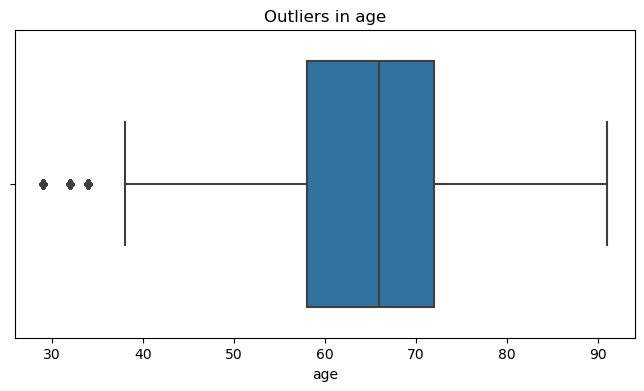

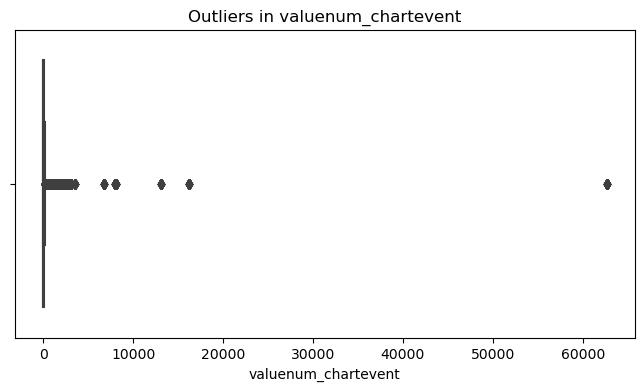

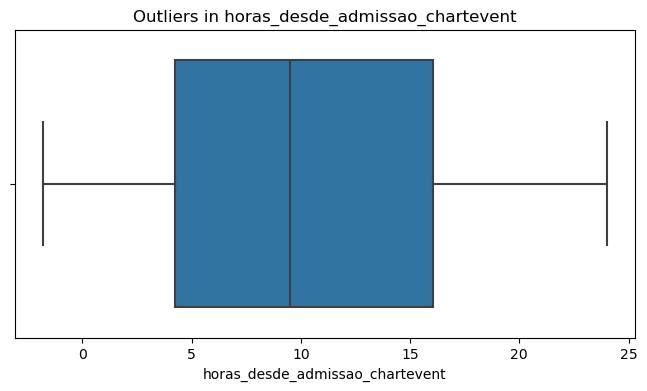

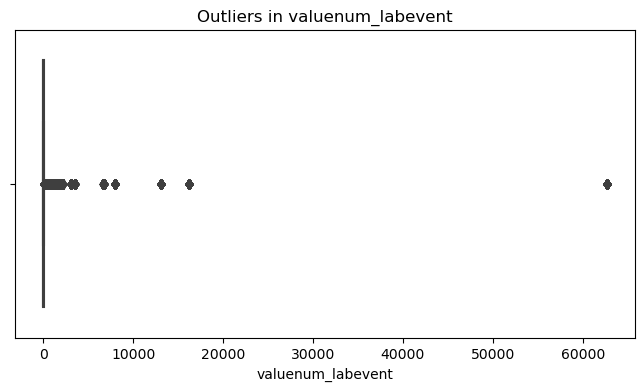

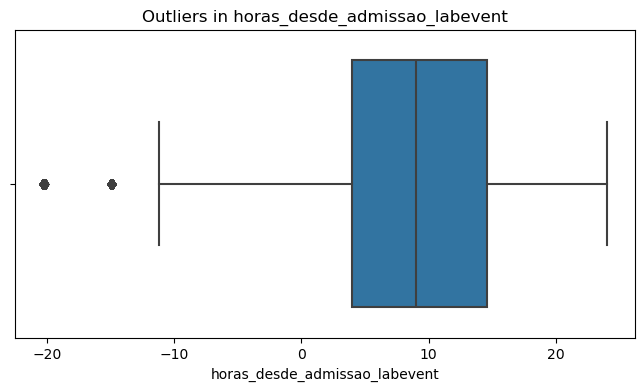

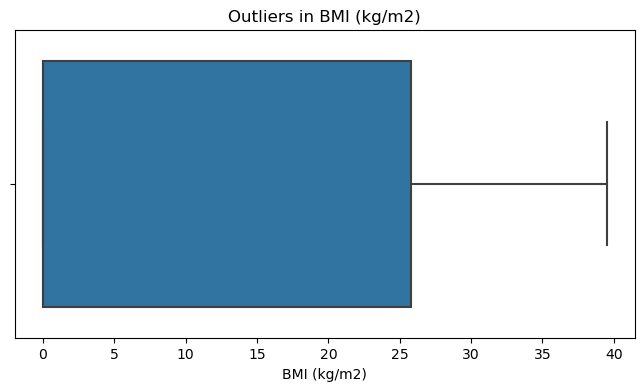

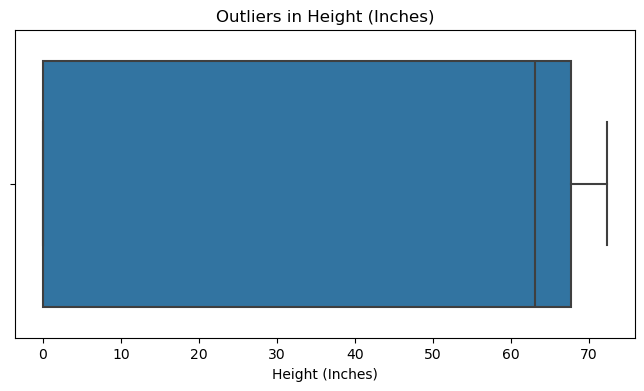

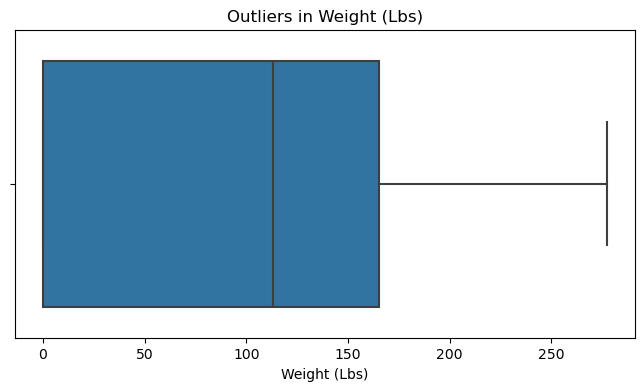

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas que queres analisar
vars = ["age", "valuenum_chartevent", "horas_desde_admissao_chartevent", 'valuenum_labevent', 'horas_desde_admissao_labevent', 'BMI (kg/m2)', 'Height (Inches)', 'Weight (Lbs)']

for col in vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_drop[col].dropna())
    plt.title(f"Outliers in {col}")
    plt.show()


In [14]:
# RETIRAR AS HORAS NEGATIVAS
# Deixar o resto do outliers, ele podem ser valiosos

df_drop = df_drop[df_drop['horas_desde_admissao_labevent'] >= 0]

# Encoding

In [13]:
print(df_drop.dtypes)

subject_id                           int64
value_chartevent                    object
valuenum_chartevent                float64
label_chartevent                    object
category                            object
horas_desde_admissao_chartevent    float64
icd_code                            object
long_title                          object
admission_type                      object
insurance                           object
race                                object
admission_location                  object
age                                  int64
value_labevent                      object
valuenum_labevent                  float64
valueuom_labevent                   object
priority                            object
horas_desde_admissao_labevent      float64
deathtime                            int64
BMI (kg/m2)                        float64
Height (Inches)                    float64
Weight (Lbs)                       float64
dtype: object


In [14]:
print(df_drop.nunique())

subject_id                           52
value_chartevent                   1243
valuenum_chartevent                1086
label_chartevent                    393
category                             22
horas_desde_admissao_chartevent    1344
icd_code                              7
long_title                            6
admission_type                        6
insurance                             3
race                                  9
admission_location                    7
age                                  35
value_labevent                     1008
valuenum_labevent                  1005
valueuom_labevent                    27
priority                              3
horas_desde_admissao_labevent       348
deathtime                             2
BMI (kg/m2)                          22
Height (Inches)                      20
Weight (Lbs)                         29
dtype: int64


In [15]:
# Rename and drop of not relevant columns

df_drop_drop = df_drop.drop(['subject_id','insurance','admission_location','value_labevent','long_title'], axis=1)
df_drop_drop.rename(columns={'deathtime': 'death', 'horas_desde_admissao_labevent': 'time_since_admission_labevent', 'horas_desde_admissao_chartevent': 'time_since_admission_chartevent', 'label_chartevent':'chart_label', 'valueuom_labevent':'lab_value_unit', 'valuenum_labevent':'lab_results', 'value_chartevent':'value_chart'}, inplace=True)

## One-Hot Encoding

icd_code, long_title, admission_type, insurance, race, admission_location, priority

In [16]:
print("original distribution:")
print(df_drop_drop['icd_code'].value_counts(normalize=True).head())

print("\n now distribution:")
print(df_drop_drop['icd_code'].value_counts(normalize=True).head())

original distribution:
icd_code
2724      0.255416
4019      0.241765
Z87891    0.129146
E785      0.125235
Z794      0.121031
Name: proportion, dtype: float64

 now distribution:
icd_code
2724      0.255416
4019      0.241765
Z87891    0.129146
E785      0.125235
Z794      0.121031
Name: proportion, dtype: float64


In [17]:
display(df_drop_drop)

,value_chart,valuenum_chartevent,chart_label,category,time_since_admission_chartevent,icd_code,admission_type,race,age,lab_results,lab_value_unit,priority,time_since_admission_labevent,death,BMI (kg/m2),Height (Inches),Weight (Lbs)
0,Full resistance,5.0,Strength L Arm,Neurological,13.116667,2724,SURGICAL SAME DAY ADMISSION,OTHER,66,138.0,mg/dL,Unknown,1.900000,0,0.0,71.00,0.00
1,1,1.0,20 Gauge Dressing Occlusive,Access Lines - Peripheral,4.183333,2724,EW EMER.,HISPANIC/LATINO - CUBAN,80,17.4,%,ROUTINE,4.200000,0,23.6,60.00,121.00
2,100,100.0,O2 saturation pulseoxymetry,Respiratory,5.316667,2724,ELECTIVE,WHITE,70,0.8,mg/dL,ROUTINE,20.000000,0,0.0,0.00,0.00
3,Some resistance,4.0,Strength L Leg,Neurological,8.500000,2724,EW EMER.,HISPANIC/LATINO - CUBAN,80,106.0,mEq/L,ROUTINE,4.200000,0,23.6,60.00,121.00
4,106,106.0,Non Invasive Blood Pressure mean,Routine Vital Signs,1.583333,2724,EW EMER.,WHITE,65,24.0,mEq/L,STAT,10.200000,0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465283,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,14.450000,Z87891,EW EMER.,WHITE,89,11.9,sec,ROUTINE,10.083333,0,26.0,66.00,161.16
465284,-1 Awakens to voice (eye opening/contact) > 10...,-1.0,Richmond-RAS Scale,Pain/Sedation,16.516667,Z87891,OBSERVATION ADMIT,WHITE,58,15.1,K/uL,STAT,2.566667,0,25.8,67.63,165.00
465285,22,22.0,Peak Insp. Pressure,Respiratory,9.516667,Z87891,OBSERVATION ADMIT,WHITE,58,31.7,sec,STAT,7.200000,0,25.8,67.63,165.00
465286,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,4.766667,Z87891,OBSERVATION ADMIT,WHITE,58,12.9,g/dL,STAT,5.483333,0,25.8,67.63,165.00


In [18]:
print(df_drop_drop.nunique())

value_chart                        1243
valuenum_chartevent                1086
chart_label                         393
category                             22
time_since_admission_chartevent    1344
icd_code                              7
admission_type                        6
race                                  9
age                                  35
lab_results                        1005
lab_value_unit                       27
priority                              3
time_since_admission_labevent       348
death                                 2
BMI (kg/m2)                          22
Height (Inches)                      20
Weight (Lbs)                         29
dtype: int64


In [28]:
from sklearn.preprocessing import OneHotEncoder

df_OH = pd.get_dummies(
    df_drop_drop,
    columns=["priority"], 
    prefix=["priority"],
    drop_first=False,
    dtype=int                
)

display(df_OH)

,value_chart,valuenum_chartevent,chart_label,category,time_since_admission_chartevent,icd_code,admission_type,race,age,lab_results,lab_value_unit,time_since_admission_labevent,death,BMI (kg/m2),Height (Inches),Weight (Lbs),priority_ROUTINE,priority_STAT,priority_Unknown
0,Full resistance,5.0,Strength L Arm,Neurological,13.116667,2724,SURGICAL SAME DAY ADMISSION,OTHER,66,138.0,mg/dL,1.900000,0,0.0,71.00,0.00,0,0,1
1,1,1.0,20 Gauge Dressing Occlusive,Access Lines - Peripheral,4.183333,2724,EW EMER.,HISPANIC/LATINO - CUBAN,80,17.4,%,4.200000,0,23.6,60.00,121.00,1,0,0
2,100,100.0,O2 saturation pulseoxymetry,Respiratory,5.316667,2724,ELECTIVE,WHITE,70,0.8,mg/dL,20.000000,0,0.0,0.00,0.00,1,0,0
3,Some resistance,4.0,Strength L Leg,Neurological,8.500000,2724,EW EMER.,HISPANIC/LATINO - CUBAN,80,106.0,mEq/L,4.200000,0,23.6,60.00,121.00,1,0,0
4,106,106.0,Non Invasive Blood Pressure mean,Routine Vital Signs,1.583333,2724,EW EMER.,WHITE,65,24.0,mEq/L,10.200000,0,0.0,0.00,0.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465283,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,14.450000,Z87891,EW EMER.,WHITE,89,11.9,sec,10.083333,0,26.0,66.00,161.16,1,0,0
465284,-1 Awakens to voice (eye opening/contact) > 10...,-1.0,Richmond-RAS Scale,Pain/Sedation,16.516667,Z87891,OBSERVATION ADMIT,WHITE,58,15.1,K/uL,2.566667,0,25.8,67.63,165.00,0,1,0
465285,22,22.0,Peak Insp. Pressure,Respiratory,9.516667,Z87891,OBSERVATION ADMIT,WHITE,58,31.7,sec,7.200000,0,25.8,67.63,165.00,0,1,0
465286,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,4.766667,Z87891,OBSERVATION ADMIT,WHITE,58,12.9,g/dL,5.483333,0,25.8,67.63,165.00,0,1,0


## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

df_LE = df_OH.copy()

cols_to_encode = [ 'icd_code', 'category', 'race', 'lab_value_unit']

# aplica label encoding em cada coluna categórica
for col in cols_to_encode:
    le = LabelEncoder()
    df_LE[col] = le.fit_transform(df_LE[col].astype(str))  # garante que valores nulos/strings sejam tratados

display(df_LE)

,value_chart,valuenum_chartevent,chart_label,category,time_since_admission_chartevent,icd_code,admission_type,race,age,lab_results,lab_value_unit,time_since_admission_labevent,death,BMI (kg/m2),Height (Inches),Weight (Lbs),priority_ROUTINE,priority_STAT,priority_Unknown
0,Full resistance,5.0,Strength L Arm,12,13.116667,0,SURGICAL SAME DAY ADMISSION,4,66,138.0,15,1.900000,0,0.0,71.00,0.00,0,0,1
1,1,1.0,20 Gauge Dressing Occlusive,1,4.183333,0,EW EMER.,2,80,17.4,4,4.200000,0,23.6,60.00,121.00,1,0,0
2,100,100.0,O2 saturation pulseoxymetry,15,5.316667,0,ELECTIVE,8,70,0.8,15,20.000000,0,0.0,0.00,0.00,1,0,0
3,Some resistance,4.0,Strength L Leg,12,8.500000,0,EW EMER.,2,80,106.0,12,4.200000,0,23.6,60.00,121.00,1,0,0
4,106,106.0,Non Invasive Blood Pressure mean,17,1.583333,0,EW EMER.,8,65,24.0,12,10.200000,0,0.0,0.00,0.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465283,74,74.0,Non Invasive Blood Pressure mean,17,14.450000,5,EW EMER.,8,89,11.9,22,10.083333,0,26.0,66.00,161.16,1,0,0
465284,-1 Awakens to voice (eye opening/contact) > 10...,-1.0,Richmond-RAS Scale,13,16.516667,5,OBSERVATION ADMIT,8,58,15.1,6,2.566667,0,25.8,67.63,165.00,0,1,0
465285,22,22.0,Peak Insp. Pressure,15,9.516667,5,OBSERVATION ADMIT,8,58,31.7,22,7.200000,0,25.8,67.63,165.00,0,1,0
465286,74,74.0,Non Invasive Blood Pressure mean,17,4.766667,5,OBSERVATION ADMIT,8,58,12.9,10,5.483333,0,25.8,67.63,165.00,0,1,0


In [27]:
print(df_LE.columns)

Index(['value_chart', 'valuenum_chartevent', 'chart_label', 'category',
       'time_since_admission_chartevent', 'icd_code', 'admission_type', 'race',
       'age', 'lab_results', 'lab_value_unit', 'time_since_admission_labevent',
       'death', 'BMI (kg/m2)', 'Height (Inches)', 'Weight (Lbs)',
       'priority_ROUTINE', 'priority_STAT', 'priority_Unknown'],
      dtype='object')


In [ ]:
# FE

urgency_rank = {
    'ELECTIVE': 1,              
    'OBSERVATION ADMIT': 2,     
    'SURGICAL SAME DAY ADMISSION': 3,  
    'URGENT': 4,                
    'DIRECT EMER.': 5,          
    'EW EMER.': 6 
}

df_drop_drop['urgency_score'] = df_drop_drop['admission_type'].map(urgency_rank)

df_drop_drop['urgency_x_lab_delay'] = df_drop_drop['urgency_score'] * df_drop_drop['time_since_admission_labevent']

In [35]:
df_drop_drop['admission_x_age'] = df_drop_drop['urgency_score'] * df_drop_drop['age']

In [ ]:
df_drop_drop.to_csv('df_final2.csv')

In [ ]:
df = pd.read_csv('df_final2.csv')

C:\Users\catar\AppData\Local\Temp\ipykernel_28952\889013762.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_final.csv')


In [20]:
display(df)

,Unnamed: 0,value_chart,valuenum_chartevent,chart_label,category,time_since_admission_chartevent,icd_code,admission_type,race,age,lab_results,lab_value_unit,priority,time_since_admission_labevent,death,BMI (kg/m2),Height (Inches),Weight (Lbs)
0,0,Full resistance,5.0,Strength L Arm,Neurological,13.116667,2724,SURGICAL SAME DAY ADMISSION,OTHER,66,138.0,mg/dL,Unknown,1.900000,0,0.0,71.00,0.00
1,1,1,1.0,20 Gauge Dressing Occlusive,Access Lines - Peripheral,4.183333,2724,EW EMER.,HISPANIC/LATINO - CUBAN,80,17.4,%,ROUTINE,4.200000,0,23.6,60.00,121.00
2,2,100,100.0,O2 saturation pulseoxymetry,Respiratory,5.316667,2724,ELECTIVE,WHITE,70,0.8,mg/dL,ROUTINE,20.000000,0,0.0,0.00,0.00
3,3,Some resistance,4.0,Strength L Leg,Neurological,8.500000,2724,EW EMER.,HISPANIC/LATINO - CUBAN,80,106.0,mEq/L,ROUTINE,4.200000,0,23.6,60.00,121.00
4,4,106,106.0,Non Invasive Blood Pressure mean,Routine Vital Signs,1.583333,2724,EW EMER.,WHITE,65,24.0,mEq/L,STAT,10.200000,0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439545,465283,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,14.450000,Z87891,EW EMER.,WHITE,89,11.9,sec,ROUTINE,10.083333,0,26.0,66.00,161.16
439546,465284,-1 Awakens to voice (eye opening/contact) > 10...,-1.0,Richmond-RAS Scale,Pain/Sedation,16.516667,Z87891,OBSERVATION ADMIT,WHITE,58,15.1,K/uL,STAT,2.566667,0,25.8,67.63,165.00
439547,465285,22,22.0,Peak Insp. Pressure,Respiratory,9.516667,Z87891,OBSERVATION ADMIT,WHITE,58,31.7,sec,STAT,7.200000,0,25.8,67.63,165.00
439548,465286,74,74.0,Non Invasive Blood Pressure mean,Routine Vital Signs,4.766667,Z87891,OBSERVATION ADMIT,WHITE,58,12.9,g/dL,STAT,5.483333,0,25.8,67.63,165.00


In [4]:
df = df.drop(columns=['admission_type'])

In [5]:
df.to_csv('df_final.csv')